<a href="https://colab.research.google.com/github/Jegovila/SI4/blob/main/0%20Introducci%C3%B3n/C%C3%B3digos/Python/Introducci%C3%B3n_a_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([4,3,2,5,6,4,2,3,4])
plt.ylabel('Numbers')
plt.show()

In [ ]:
plt.plot([3,2,1,4],[1,4,9,16]) # Coordenadas
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [ ]:
plt.plot([3,2,1,4],[1,4,9,16], '--ro') # dibujar con círculos rojos y línea punteada
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [ ]:
plt.plot([3,2,1,4],[1,4,9,16], 'ro') # dibujar con círculos rojos sin trazar línea
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Determinar los ejes

In [ ]:
plt.plot([3,2,1,4],[1,4,9,16], 'bo')
plt.axis([0,15,0,20])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Agregar rejilla

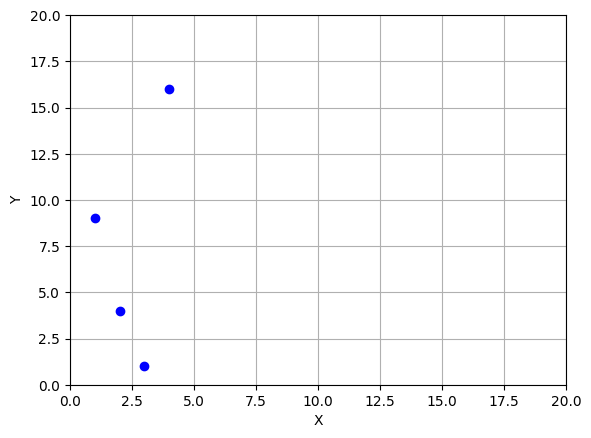

In [5]:
plt.plot([3,2,1,4],[1,4,9,16], 'bo')
plt.axis([0,20,0,20])

plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Con numpy

In [7]:
import numpy as np

In [ ]:
t = np.arange(0,5,0.2)
plt.plot(t,t,'--r')
#plt.plot(t,t**2,'bs')
#plt.plot(t, t**3, 'g^')

plt.ylabel('y')
plt.xlabel('t')
plt.show()

## Ejemplo 1

In [ ]:
data = {'a' : np.arange(50),
        'c' : np.random.randint(0,50,50),
        'd' : np.random.randn(50)}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # data = nuestro Diccionario
plt.xlabel('entry a')
plt.ylabel('entry b')

plt.grid()
plt.show()

## Ejemplo 2

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)

plt.subplot(1,3,2)
plt.scatter(names, values)

plt.subplot(1,3,3)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

## Ejemplo 3

In [ ]:
def f(t):
  return np.exp(-t) * np.cos(2 * np.pi * t)

t1 =  np.arange(0.0, 5.0, 0.2)
t2 =  np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.title(r'$e^t \cos (2 \pi t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')

plt.show()

## Ejemplo 4

In [ ]:
import matplotlib.image as mpimg
!wget -nc "https://raw.githubusercontent.com/Jegovila/Taller-Vision/main/dataset/lena.png"

In [ ]:
# subplots
f, axes = plt.subplots(2,2)

# Leer imagen
img = mpimg.imread('lena.png')

# Obtener dimensiones
height, width, layer = img.shape

# Escala de grises
imgGray = np.zeros((height, width))

for i in range(height):
  for j in range(width):
    imgGray[i,j] = ((img[i,j,0]) + (img[i,j,1]) + (img[i,j,2]))/3

# Crear filtro
Sobel1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
imgSobel = np.zeros((height-2, width-2))
imgFinal = np.zeros((height-2, width-2))

for i in range(1, height-1):
  for j in range(1, width-1):
    imTemp = imgGray[i-1:i+2,j-1:j+2]
    temp = np.abs((Sobel1*imTemp).sum())
    imgSobel[i-1,j-1] = temp
    if temp > 0.5:
      imgFinal[i-1, j-1] = True
    else:
      imgFinal[i-1, j-1] = False


axes[0,0].imshow(img)
axes[0,0].set_title('Imagen original')
axes[0,1].imshow(imgGray, cmap=plt.cm.gray)
axes[0,1].set_title('Escala de grises')
axes[1,0].imshow(imgSobel, cmap=plt.cm.gray)
axes[1,0].set_title('Imagen Filtrada')
axes[1,1].imshow(imgFinal, cmap=plt.cm.binary)
axes[1,1].set_title('Bordes')

f.subplots_adjust(hspace = 0.5)
plt.show()